In [20]:
%matplotlib inline
from __future__ import print_function, division
from scipy import stats
import pandas as pd
import numpy as np
import random
import matplotlib
import thinkstats2
import thinkplot

In [21]:
# This line reads the dataset file with pandas
# I chose the dataset wins and the question: 
# What is the relationship between the players' wins and saves?
ps = pd.read_csv('C:\Users\mariambadawy\Desktop\core\Teams.csv')

In [22]:
# I will observe the similarities between Players' wins and saves
wins = ps['W'].dropna()
saves = ps['SV'].dropna()

In [23]:
ps[['W', 'SV']]

,W,SV
0,20,3
1,19,1
2,10,0
3,7,0
4,16,0
5,21,0
6,4,0
7,13,0
8,15,0
9,35,1


In [24]:
# These are some of the calculations and statistics for the Wins and Saves columns

print ('Minimum value of the wins is %.2f' %wins.min())
print ('Maximum value of the wins is %.2f' %wins.max())
print ('Mean of the wins is %.2f' %wins.mean())
print ('Standard Deviation of the wins is %.2f' %wins.std())
print ('Variance of the wins is %.2f' %wins.var())
print ('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Minimum value saves is %.2f' %saves.min())
print ('Maximum value saves is %.2f' %saves.max())
print ('Mean of the saves is %.2f' %saves.mean())
print ('Standard Deviation of the saves is %.2f' %saves.std())
print ('Variance of the saves is %.2f' %saves.var())

Minimum value of the wins is 0.00
Maximum value of the wins is 116.00
Mean of the wins is 74.81
Standard Deviation of the wins is 17.59
Variance of the wins is 309.45
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Minimum value saves is 0.00
Maximum value saves is 68.00
Mean of the saves is 23.87
Standard Deviation of the saves is 16.33
Variance of the saves is 266.64


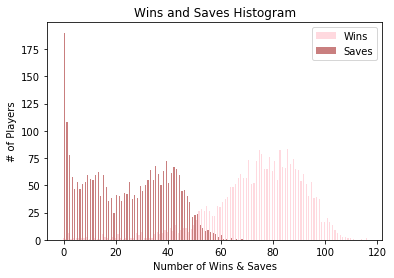

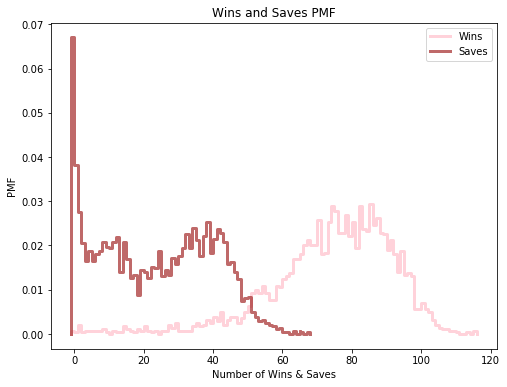

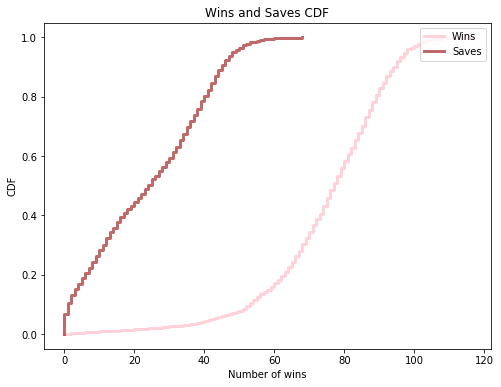

In [27]:
# This is the histogram of the relationship between Wins and Saves
wins_hist = thinkstats2.Hist(wins,label="Wins")
saves_hist = thinkstats2.Hist(saves,label="Saves")
thinkplot.Hist(wins_hist, color='Pink', width=0.45, align='right')
thinkplot.Hist(saves_hist, color='Brown', width=0.45, align='left') 
thinkplot.Show(xlabel='Number of Wins & Saves', ylabel='Number of Players' ,loc='upper right', title='Wins and Saves Histogram')

# This is the PMF of the histogram of the relationship between Wins and Saves
wins_hist1 = thinkstats2.Pmf(wins,label="Wins")
saves_hist1 = thinkstats2.Pmf(saves,label="Saves")
thinkplot.PrePlot(2)
thinkplot.Pmf(wins_hist1, color='Pink', align='right')
thinkplot.Pmf(saves_hist1, color='Brown', align='right') 
thinkplot.Show(xlabel='Number of Wins & Saves', ylabel='PMF',loc='upper right',title='Wins and Saves PMF')

# This is the CDF of the histogram of the relationship between Wins and Saves 
wins_hist2 = thinkstats2.Cdf(wins)
saves_hist2 = thinkstats2.Cdf(saves)
thinkplot.Cdf(wins_hist2, color='Pink',label="Wins")
thinkplot.Cdf(saves_hist2, color='Brown',label="Saves") 
thinkplot.Show(xlabel='Number of Wins and Saves', ylabel='CDF',loc='upper right',title='Wins and Saves CDF')

In [34]:
# This part calcultes the values of the means, standard deviations, medians, PDFs densities of the Wins and Saves
# and prints them in the end
wins_mean = wins.mean()
wins_std = wins.std()
saves_mean = saves.mean()
saves_std = saves.std()

wins_pdf = thinkstats2.NormalPdf(wins_mean, wins_std)
saves_pdf = thinkstats2.NormalPdf(saves_mean, saves_std)

def Median(xs):
    
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

wins_median = Median(wins_pdf)
saves_median = Median(saves_pdf)

print ('Wins Mean:  '+ str(wins_mean)) 
print ('Saves Mean: '+ str(saves_mean))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Wins Standard Deviation:  ' + str(wins_std))
print('Saves Standard Deviation: ' + str(saves_std))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Wins Median:  '  + str(wins_median))
print ('Saves Median: '  + str(saves_median))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print ('Density of Wins PDF:  ' +str(wins_pdf.Density(wins_mean+ wins_std)))
print ('Density of Saves PDF: ' +str(saves_pdf.Density(saves_mean+ saves_std)))

Wins Mean:  74.8141093474
Saves Mean: 23.867372134
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Wins Standard Deviation:  17.5912083846
Saves Standard Deviation: 16.3291407291
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Wins Median:  74.8141093474
Saves Median: 23.867372134
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Density of Wins PDF:  0.0137552076713
Density of Saves PDF: 0.0148183378742


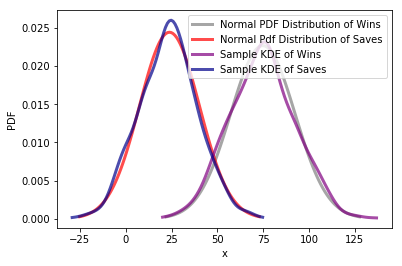

In [47]:
# This part plots the Normal PDF Distribustions and the Sample KDEs of the Wins and Saves
thinkplot.Pdf(wins_pdf, label='Normal PDF Distribution of Wins',color='Gray')
thinkplot.Pdf(saves_pdf, label='Normal PDF Distribution of Saves',color='Red')

wins_smp = np.random.normal(wins_mean, wins_std, 1000)
saves_smp = np.random.normal(saves_mean, saves_std, 1000)

wins_smp_pdf = thinkstats2.EstimatedPdf(wins_smp)
saves_smp_pdf = thinkstats2.EstimatedPdf(saves_smp)

thinkplot.Pdf(wins_smp_pdf, label='Sample KDE of Wins',color='Purple')
thinkplot.Pdf(saves_smp_pdf, label='Sample KDE of Saves',color='darkblue')

thinkplot.Show(xlabel='x', ylabel='PDF')

In [54]:
# Covariance of Wins and Saves
def Covariance(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    covariance = np.dot(xs-meanx, ys-meany) / len(xs)
    return covariance

print('Covariance of Wins and Saves by 100: ')
Covariance(wins, saves)*100

Covariance of Wins and Saves by 100: 


14528.151855895536

In [55]:
# Correlation between Wins and Saves
def Correlation(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    correlation = Covariance(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return correlation
print('Correlation of Wins and Saves by 100: ')
Correlation(wins, saves)*100

Correlation of Wins and Saves by 100: 


50.594648470958006

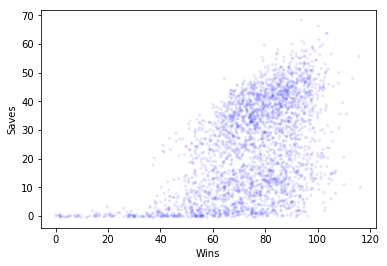

In [57]:
# This is the Jitter graph for the results
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

heights = Jitter(wins, 0.3)
weights = Jitter(saves, 0.3)

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Wins',
                 ylabel='Saves',                 
                 legend=False)

0.0


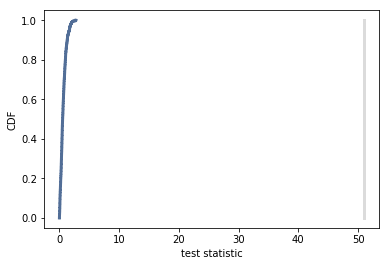

In [59]:
# This part is for the Hypothesis Test of the results
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
total_data = wins.values, saves.values
ws = DiffMeansPermute(total_data)
pvalue = ws.PValue()
print (pvalue)
ws.PlotCdf()
thinkplot.Show(xlabel=Test Statistic', ylabel='CDF')